In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import linalg
from sklearn.metrics import accuracy_score
import matplotlib as mpl
import math

In [13]:
dataset=pd.read_csv('/content/iris_data.csv')

In [14]:
dataset=dataset[['petal length','petal width','class']]

In [15]:
dataset.head()

,petal length,petal width,class
0,1.4,0.2,Iris-setosa
1,1.4,0.2,Iris-setosa
2,1.3,0.2,Iris-setosa
3,1.5,0.2,Iris-setosa
4,1.4,0.2,Iris-setosa


In [16]:
main_val=list(dataset['class'].unique())
for val in main_val:
    dataset.loc[dataset['class']==val,'class']=main_val.index(val)
    print(val,main_val.index(val))

Iris-setosa 0
Iris-versicolor 1
Iris-virginica 2


In [17]:
def get_mean(dataset,feature,cls):
  df=dataset[dataset['class']==cls]
  feature_sum=df[feature].sum()
  feature_length=df.shape[0]
  return feature_sum/feature_length

def get_covariance(dataset,cls):
  df=dataset[dataset['class']==cls]
  features=list(df.columns)
  features.pop(features.index('class'))
  row_1=[0,0]
  row_2=[0,0]
  mean_feature_1=get_mean(df,features[0],cls)
  mean_feature_2=get_mean(df,features[1],cls)
  for rows in df.iterrows():
    row_1[0]+=((rows[1][0]-mean_feature_1)**2)/df.shape[0]
    row_1[1]+=(rows[1][0]-mean_feature_1)*(rows[1][1]-mean_feature_2)/df.shape[0]
    row_2[0]+=(rows[1][0]-mean_feature_1)*(rows[1][1]-mean_feature_2)/df.shape[0]
    row_2[1]+=((rows[1][1]-mean_feature_2)**2)/df.shape[0]
  Matrix=[]  
  Matrix.append(row_1)
  Matrix.append(row_2)
  return Matrix


In [18]:
def plot_ellipse(splot, mean, cov, color):
    v, w = linalg.eigh(cov)
    u = w[0] / linalg.norm(w[0])
    angle = np.arctan(u[1]/u[0])
    angle = 180 * angle / np.pi # convert to degrees
    ell = mpl.patches.Ellipse(mean, 4 * v[0] ** 0.5, 4 * v[1] ** 0.5,
                                            180 + angle, color=color)
    ell.set_clip_box(splot.bbox)
    ell.set_alpha(0.5)
    splot.add_artist(ell)
    splot.plot(mean[0],mean[1],"*",color="yellow",markersize=15)

In [19]:
labels=['Iris-setosa','Iris-versicolor','Iris-virginica']

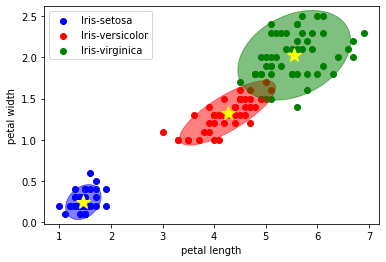

In [20]:
splot = plt.figure()
splot = plt.subplot(1, 1, 1)
color=['b','r','g']
for i in range(3):
  df=dataset[dataset['class']==i]
  plt.scatter(df['petal length'],df['petal width'],c=color[i],label=labels[i])
  plt.xlabel('petal length')
  plt.ylabel('petal width')
  plt.legend()
  mean=[get_mean(df,'petal length',i),get_mean(df,'petal width',i)]
  cov_matrix=get_covariance(df,i)
  plot_ellipse(splot,mean,cov_matrix,color[i])

In [21]:
#b part jisme hamne mean and covariance sample se uthaya tha

cov_matrix=np.array(get_covariance(dataset,0))
mean=[1.464,0.244]
def compute_likelihood(dataset,cov_matrix,mean,cls):
  Matrix=1
  for rows in dataset.iterrows():
    x=np.array([rows[1][0],rows[1][1]])
    comp_1=np.subtract(x,mean)
    trans_comp_1=comp_1.transpose()
    COV=np.linalg.inv(cov_matrix)
    result=comp_1 @ COV @ trans_comp_1
    det=(np.linalg.det(cov_matrix))**0.5
    final=np.log(1/(2*3.14*det))+((-1/2)*result)
    Matrix=Matrix+final
  return Matrix
compute_likelihood(dataset,cov_matrix,mean,0)


-24385.489537341535

In [22]:
def get_probab(dataset,cov_matrix,mean,cls):
  Matrix=[]
  for rows in dataset.iterrows():
    x=np.array([rows[1][0],rows[1][1]])
    comp_1=np.subtract(x,mean)
    trans_comp_1=comp_1.transpose()
    COV=np.linalg.inv(cov_matrix)
    result=comp_1 @ COV @ trans_comp_1
    det=(np.linalg.det(cov_matrix))**0.5
    final=(1/3)*(1/(2*3.14*det))*np.exp(((-1/2)*result))
    Matrix.append(final)
  return Matrix

In [23]:
def compute_final_likelihood(dataset,cov_matrix,mean,cls):
  Matrix=1
  for rows in dataset.iterrows():
    x=np.array([rows[1][0],rows[1][1]])
    comp_1=np.subtract(x,mean)
    trans_comp_1=comp_1.transpose()
    COV=np.linalg.inv(cov_matrix)
    result=comp_1 @ COV @ trans_comp_1
    det=(np.linalg.det(cov_matrix))**0.5
    print(1/(2*3.14*det))
    final=(1/(2*3.14*det))*(np.exp((-1/2)*result))
    Matrix=Matrix*final
  return Matrix

In [24]:

def get_MLE(dataset,cls):
  mean=[get_mean(dataset,'petal length',cls),get_mean(dataset,'petal width',cls)]
  variance=np.var(dataset[['petal length','petal width']].values,axis=0)
  var=np.multiply(variance,[[1,0],[0,1]])
  return (mean,var)

In [25]:
get_MLE(X_train[X_train['class']==0],0)

([1.45625, 0.253125], array([[0.03808594, 0.        ],
        [0.        , 0.00936523]]))

In [26]:
get_MLE(X_train[X_train['class']==1],1)

([4.282857142857143, 1.3457142857142856], array([[0.21056327, 0.        ],
        [0.        , 0.03448163]]))

In [27]:
get_MLE(X_train[X_train['class']==2],2)

([5.5210526315789465, 2.036842105263158], array([[0.22218837, 0.        ],
        [0.        , 0.07180055]]))

In [28]:
from sklearn.model_selection import train_test_split as tts
user_prompt = 0.3
user_enable = True
X=dataset[['petal length','petal width','class']]
Y=dataset['class']
X_train,X_test,y_train,y_test = tts(X,Y,test_size=user_prompt,shuffle=user_enable)
X_test_1=X_test.copy()
X_test_2=X_test.copy()
X_test_3=X_test.copy()

In [29]:
def BayesClassifier(test_point,mean,variance):
    mean = np.array([mean])
    X = test_point-mean
    p1 = ((1/(2*3.14)**0.5)/(np.linalg.det(variance)))**0.5
    p2 = np.exp(-0.5*np.matmul(np.matmul(X,np.linalg.inv(variance)),np.transpose(X)))
    P = (1/3)*p1*p2
    return(P)

In [45]:
def prediction(X_test,dataset,y_test):
  Prid=[]
  
  for rows in X_test.iterrows():
    row=[rows[1][0],rows[1][1]]
    mean_0,var_0=get_MLE(dataset[dataset['class']==0],0)
    class_0=BayesClassifier(row,mean_0,var_0)
    mean_1,var_1=get_MLE(dataset[dataset['class']==1],1)
    class_1=BayesClassifier(row,mean_1,var_0)
    mean_2,var_2=get_MLE(dataset[dataset['class']==2],2)
    class_2=BayesClassifier(row,mean_2,var_2)
    List=[class_0,class_1,class_2]
    Prid.append(List.index(max(List)))
  return Prid  

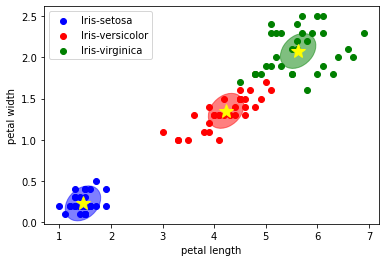

In [31]:
splot = plt.figure()
splot = plt.subplot(1, 1, 1)
color=['b','r','g']
for i in range(3):
  df=X_train[X_train['class']==i]
  plt.scatter(df['petal length'],df['petal width'],c=color[i],label=labels[i])
  plt.xlabel('petal length')
  plt.ylabel('petal width')
  plt.legend()
  mean,cov=get_MLE(X_train[X_train['class']==i],i)
  plot_ellipse(splot,mean,cov_matrix,color[i])

In [54]:
def plotGaussian(mean_mat,cov_mat,label):
  plt.figure(figsize=(16,10))
  mu1=mean_mat[0]
  var1=cov_mat[0,0]
  mu2=mean_mat[1]
  var2=cov_mat[1,1]
  sd1=math.sqrt(var1)
  sd2=math.sqrt(var2)
  x1=np.linspace(mu1-3*sd1,mu1+3*sd1,100)
  x2=np.linspace(mu2-3*sd2,mu2+3*sd2,100)
  plt.plot(x1, stats.norm.pdf(x1, mu1, sd1),label='petal length')
  plt.plot(x2, stats.norm.pdf(x2, mu2, sd2),label='petal width')
  plt.title(f'Gaussian Distribution for class {label}')
  plt.legend()

In [46]:
prid=prediction(X_test,X_train,y_test)
accuracy_score(prid,y_test.tolist())

0.9777777777777777

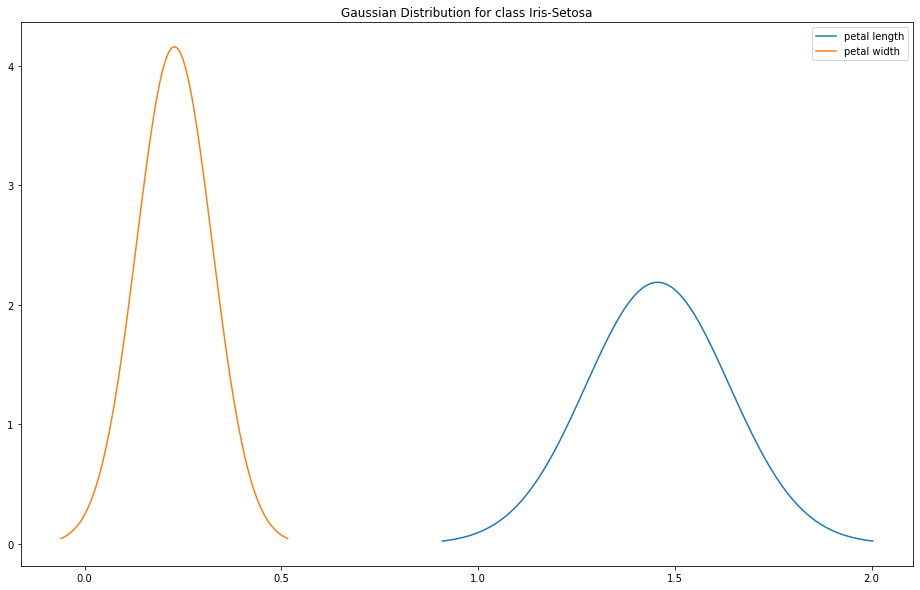

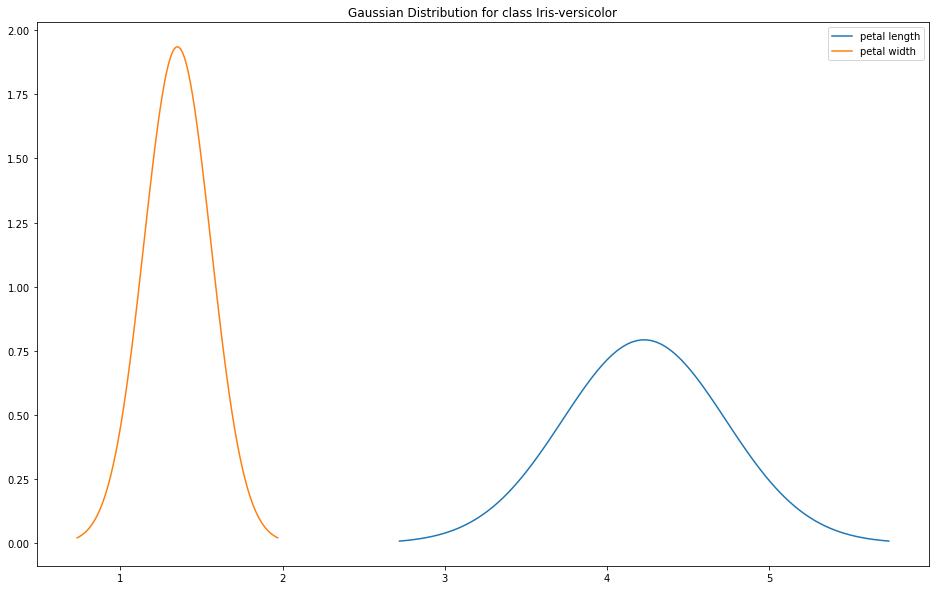

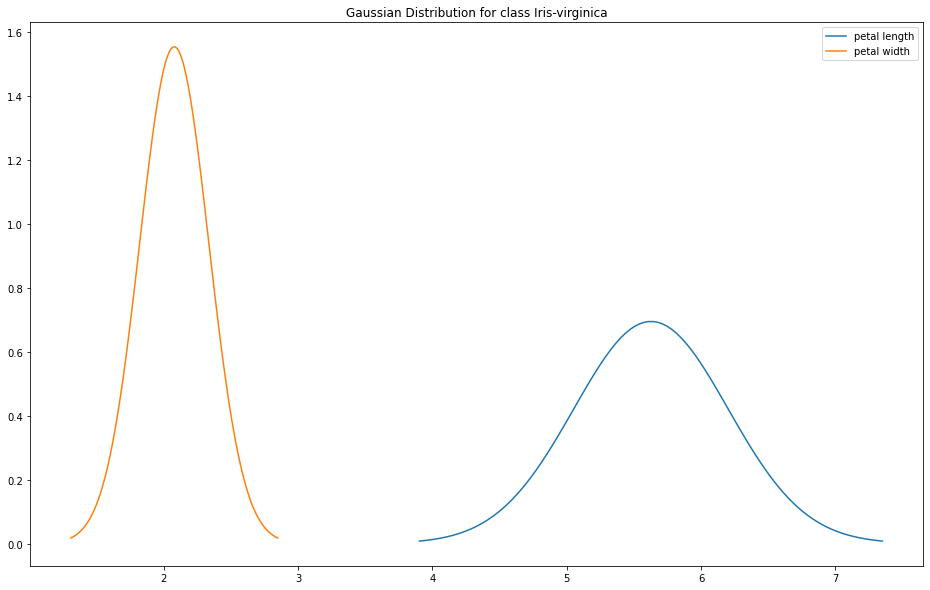

In [55]:
mean_0,cov_0=get_MLE(X_train[X_train['class']==0],0)
from scipy import stats
plotGaussian(mean_0,cov_0,'Iris-Setosa')
mean_0,cov_0=get_MLE(X_train[X_train['class']==1],1)
from scipy import stats
plotGaussian(mean_0,cov_0,'Iris-versicolor')
mean_0,cov_0=get_MLE(X_train[X_train['class']==2],2)
from scipy import stats
plotGaussian(mean_0,cov_0,'Iris-virginica')

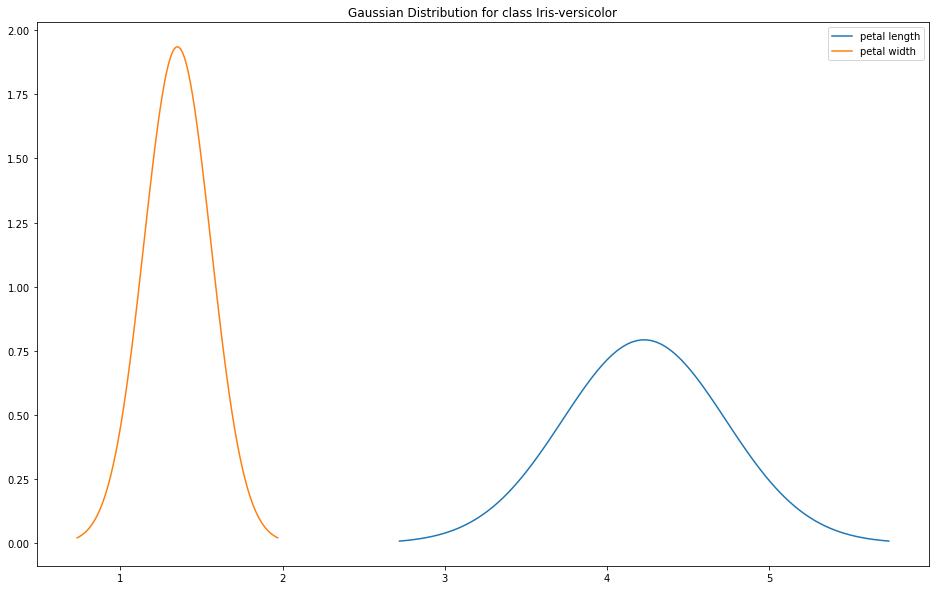

In [53]:
mean_0,cov_0=get_MLE(X_train[X_train['class']==1],1)
from scipy import stats
plotGaussian(mean_0,cov_0,'Iris-versicolor')